# Recommender Systems

This work explores the concept of recommender systems, the algorithms, and techniques used in their creation and exploitation, as well as metrics used in their evaluation. The work covers both personalized and non-personalized approaches, content-based and collaborative techniques, use of matrix factorization and hybrid techniques in modern large-scale recommender systems.

## Introduction

A *recommender system* or a *recommendation system* (sometimes replacing "system" with a synonym such as platform or engine) is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item

Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. There are also recommender systems for experts, collaborators, jokes, restaurants, garments, financial services, life insurance, romantic partners (online dating), and Twitter pages.

Recommender systems typically produce a list of recommendations in one of two ways:

 - Non-personalized approach
 - Personalized approach

Personalized-based recommender systems also have common subtypes:

 - Collaborative filtering recommender systems
 - Content-based recommender systems

All the techniques mentioned above have their own problems and pitfalls, which developers face creating and applying recommender systems to real-world problems. They must be taken into account while designing system architecture, and will be covered later in this work. Though the field of recommendation itself is relatively old, there are still no solutions that work perfectly for every case. Designing and evaluating a recommender system is hard, and requires a deep understanding of domain knowledge and data available, as well as constant experimenting and modification. First recommender systems appeared long time ago in 1990's, but the intense research started quite recently with the availability of better computational power and tremendous amounts of data coming from all different sources in internet.

One of the events that energized research in recommender systems was the Netflix Prize. From 2006 to 2009, Netflix sponsored a competition, offering a grand prize of $1,000,000 to the team that could take an offered dataset of over 100 million movie ratings and return recommendations that were 10% more accurate than those offered by the company's existing recommender system

This competition energized the search for new and more accurate algorithms. The most accurate algorithm in 2007 used an ensemble method of 107 different algorithmic approaches, blended into a single prediction:

>Predictive accuracy is substantially improved when blending multiple predictors. Our experience is that most efforts should be concentrated in deriving substantially different approaches, rather than refining a single technique. Consequently, our solution is an ensemble of many methods.

Beside classical approaches to recommendation with techniques described above, there are a lot of different cases that require modifications or special settings:

 - Group recommender systems
 - Context-aware recommender systems
 - Risk-aware recommender systems

## Common notation

For convenience, we are going to use the same notation across this work:

### Basic objects

We need a way to talk about users, items, and the ratings matrix

$I$ - the set of items.<br>

$U$ - the set of users.<br>

$R$ - the ratings matrix or set of ratings.<br>

$u, v \in U$ - individual user.<br>

$i, j \in I$ - individual item.<br>

$r_{ui} \in R$ - a rating given by user $u$ for item $i$.<br>

$R_{u} \subset R$ - the set of ratings given by user $u$.<br>

$R_{i} \subset R$ - the set of ratings given for item $i$.<br>

$\vec{r_{u}}$ or $r_{u}$ - the ratings given by user $u$, as a vector with missing values for unrated items.
We will often work with a normalized vector $\hat{r_{u}}$.<br>

$\vec{r_{i}}$ or $r_{i}$ - the ratings given for item $i$, as a vector with missing values for unrated items.<br>

### Scoring and ordering

We are going to use it to describe scoring algorithms.

$s(i; u)$ - the score for item $i$ for user $u$.<br>

$s(i; u,q,x)$ - the score for item $i$ for user $u$ with query $q$ in context $x$.<br>

$O(I; u,q,x)$ - the ordering for items $I$ for user $u$ with query $q$ in context $x$.<br>

### Matrix factorization

Notation for SVD and other decomposition techniques.

$R = P\Sigma Q^{T}$ - a factorization of the ratings matrix $R$ into a $|U| \times k$ user-feature preference matrix $P$ and a $|I| \times k$ item-feature relevance matrix $Q$.<br>

$\vec{p_{u}}$ or $p_{u}$ - the user feature vector over latent features.<br>

$\vec{q_{i}}$ or $q_{i}$ - the item feature vector.<br>

Background work
Design 
Methodology 
Implementation 


Conclusion

### Non-personalized Recommendation

Though non-personalized recommenders are rarely used in modern systems by themselves, they are still very powerful in combination with other algorithms, and, sometimes, the only available option. 

How can we make a recommendation for a user that we have little or no data about? 

That's where stereotype-based recommendations can be made, and most of the times we can take into account:

 - items popularity
 - user demographic data 
 - user actions during that particular session (for example, items in online-shop basket)

#### Mean-based recommendation:

One of the common approaches we can use is mean-based recommendation.

Basic mean is computed using the following formula:
$$\mu = \frac{\Sigma_{u \in U_{i}}r_{ui}}{|U_{i}|}$$

And can be used for recommending items with the highest rating. However, in order to make our recommendations more stable, we can use "damped" mean algorithm and add some "fake" global mean rating to our score. 

$$s(i) = \frac{\Sigma_{u \in U_{i}}r_{ui} + \alpha\mu}{|U_{i}| + \alpha}$$

Where $\alpha$ is a damping parameter, which represents the number of "fake" ratings we are adding. Because of that damping factor, recommender become less tend to make extreme recommendations.

#### Associative rule recommendation:

This approach is used to recommend items that are related to chosen one ("People who buy this also bought...") and, therefore, uses *reference item* to provide recommendations.

The association rule formula is derived from Bayes theorem:

$$P(i|j) = \frac{P(i \vee j)}{P(j)}$$

In this case, *j* is the *reference item*, and *i* is an item to be scored.

We estimate probabilities by counting: $P (i)$ is the fraction of users in the system who
purchased item i; $P(i\vee j)$ is the fraction that purchased both $i$ and $j$

$$P(i|j) = \frac{P(i \vee j)}{P(j)} = \frac{|U_{i} \cap U{j}|/|U|}{|U_{j}| / |U|}$$

The advanced version of this rule computes how much more likely someone is to rate an item $i$ when they rated $j$ than they would have if we do not know anything about whether they have rated $j$:

$$P(i|j) = \frac{P(i \vee j)}{P(i)P(j)}$$

The following Python code produces some example of non-personalized data analysis based on Movie Lens movie ratings dataset:

In [6]:
# import libraries for data exploration and basic statistical functions

import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('HW1-data.csv')
data

,User,"Gender (1 =F, 0=M)",260: Star Wars: Episode IV - A New Hope (1977),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),1: Toy Story (1995),2028: Saving Private Ryan (1998),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,0,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,5277,0,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,1577,1,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,0,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,1202,1,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
5,3823,1,2.0,4.0,4.0,4.0,NaN,NaN,3.0,1.0,...,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
6,5448,0,NaN,NaN,3.0,1.0,1.0,4.0,NaN,5.0,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
7,5347,0,4.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,...,NaN,2.0,3.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
8,4117,1,5.0,1.0,NaN,4.0,2.0,4.0,4.0,4.0,...,2.0,3.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,2765,0,4.0,2.0,NaN,5.0,3.0,NaN,4.0,3.0,...,NaN,NaN,2.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN


Let's first calculate top movies by mean score:

In [9]:
# Top movies by mean score
means = data.iloc[:, 2:].mean().sort_values(ascending=False)
means

318: Shawshank Redemption, The (1994)                      3.600000
260: Star Wars: Episode IV - A New Hope (1977)             3.266667
541: Blade Runner (1982)                                   3.222222
1265: Groundhog Day (1993)                                 3.166667
593: Silence of the Lambs, The (1991)                      3.062500
296: Pulp Fiction (1994)                                   3.000000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
2028: Saving Private Ryan (1998)                           3.000000
34: Babe (1995)                                            3.000000
527: Schindler's List (1993)                               3.000000
3578: Gladiator (2000)                                     2.916667
2396: Shakespeare in Love (1998)                           2.909091
1198: Raiders of the Lost Ark (1981)                       2.909091
2571: Matrix, The (1999)                                   2.833333
2762: Sixth Sense, The (1999)                   

And rating counts:

In [10]:
# Counts
counts = data.iloc[:, 2:].count()
counts.sort_values(ascending=False)

1: Toy Story (1995)                                        17
593: Silence of the Lambs, The (1991)                      16
260: Star Wars: Episode IV - A New Hope (1977)             15
1210: Star Wars: Episode VI - Return of the Jedi (1983)    14
780: Independence Day (ID4) (1996)                         13
2762: Sixth Sense, The (1999)                              12
527: Schindler's List (1993)                               12
2571: Matrix, The (1999)                                   12
1265: Groundhog Day (1993)                                 12
2916: Total Recall (1990)                                  12
3578: Gladiator (2000)                                     12
2028: Saving Private Ryan (1998)                           11
1259: Stand by Me (1986)                                   11
296: Pulp Fiction (1994)                                   11
1198: Raiders of the Lost Ark (1981)                       11
2396: Shakespeare in Love (1998)                           11
318: Sha

Sometimes, we do not need to know precise rating to make recommendation. Therefore, we can define some ratings as positive (in this example, all the ratings >= 4):

In [11]:
# Top movies by percentage of positive marks
counts_positive = data.iloc[:, 2:][data.iloc[:, 2:] >= 4].count()
counts_positive.sort_values(ascending=False)
(counts_positive / counts).sort_values(ascending=False)

318: Shawshank Redemption, The (1994)                      0.700000
260: Star Wars: Episode IV - A New Hope (1977)             0.533333
3578: Gladiator (2000)                                     0.500000
541: Blade Runner (1982)                                   0.444444
593: Silence of the Lambs, The (1991)                      0.437500
2571: Matrix, The (1999)                                   0.416667
1265: Groundhog Day (1993)                                 0.416667
34: Babe (1995)                                            0.400000
296: Pulp Fiction (1994)                                   0.363636
2028: Saving Private Ryan (1998)                           0.363636
1259: Stand by Me (1986)                                   0.363636
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.357143
1: Toy Story (1995)                                        0.352941
527: Schindler's List (1993)                               0.333333
2762: Sixth Sense, The (1999)                   

Let's imagine we watched the movie "Toy Story" and we want to have a list of relevant movies to watch next. We can apply association rule here:

In [12]:
# Percentage of people who watched Toy Story also watched...
associative_product = '1: Toy Story (1995)'

watched_product = data.iloc[:, 2:][data[associative_product].notnull()].count()
(watched_product / data[associative_product].count()).sort_values(ascending=False)

1: Toy Story (1995)                                        1.000000
260: Star Wars: Episode IV - A New Hope (1977)             0.823529
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.764706
593: Silence of the Lambs, The (1991)                      0.764706
780: Independence Day (ID4) (1996)                         0.764706
1265: Groundhog Day (1993)                                 0.647059
2916: Total Recall (1990)                                  0.647059
296: Pulp Fiction (1994)                                   0.588235
2762: Sixth Sense, The (1999)                              0.588235
527: Schindler's List (1993)                               0.588235
3578: Gladiator (2000)                                     0.529412
1259: Stand by Me (1986)                                   0.529412
1198: Raiders of the Lost Ark (1981)                       0.529412
2571: Matrix, The (1999)                                   0.529412
2028: Saving Private Ryan (1998)                

Beside association, we can also define similarity by basically measuring products corellation:

In [13]:
# Correlation between Toy Story and other movie ratings
data.iloc[:, 2:].corrwith(data[associative_product]).sort_values(ascending=False)

1: Toy Story (1995)                                        1.000000
318: Shawshank Redemption, The (1994)                      0.888523
34: Babe (1995)                                            0.811107
296: Pulp Fiction (1994)                                   0.709842
2028: Saving Private Ryan (1998)                           0.596849
356: Forrest Gump (1994)                                   0.522913
541: Blade Runner (1982)                                   0.329634
3578: Gladiator (2000)                                     0.253396
2916: Total Recall (1990)                                  0.163796
2396: Shakespeare in Love (1998)                           0.101768
1265: Groundhog Day (1993)                                -0.062858
780: Independence Day (ID4) (1996)                        -0.069923
260: Star Wars: Episode IV - A New Hope (1977)            -0.119005
527: Schindler's List (1993)                              -0.220315
2762: Sixth Sense, The (1999)                   

Making recommendations above, we did not use data about user's gender. Statistically, men and women tend to like or dislike different kinds of movies, so, in order to make non-personalized recommendations more precise, we can take this information into account and see the difference:

In [14]:
# Means separate by gender
gender_column_name = 'Gender (1 =F, 0=M)'
male_means = data.iloc[:, 2:][data[gender_column_name] == 0].mean()
female_means = data.iloc[:, 2:][data[gender_column_name] == 1].mean()

In [15]:
# Male means
male_means.sort_values(ascending=False)

1198: Raiders of the Lost Ark (1981)                       3.666667
527: Schindler's List (1993)                               3.500000
1265: Groundhog Day (1993)                                 3.500000
318: Shawshank Redemption, The (1994)                      3.400000
593: Silence of the Lambs, The (1991)                      3.333333
2571: Matrix, The (1999)                                   3.142857
2028: Saving Private Ryan (1998)                           3.142857
260: Star Wars: Episode IV - A New Hope (1977)             3.125000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
1259: Stand by Me (1986)                                   3.000000
541: Blade Runner (1982)                                   3.000000
780: Independence Day (ID4) (1996)                         2.857143
3578: Gladiator (2000)                                     2.833333
2762: Sixth Sense, The (1999)                              2.666667
296: Pulp Fiction (1994)                        

In [16]:
#Female means
female_means.sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           4.250000
296: Pulp Fiction (1994)                                   4.000000
318: Shawshank Redemption, The (1994)                      3.800000
1: Toy Story (1995)                                        3.571429
541: Blade Runner (1982)                                   3.500000
34: Babe (1995)                                            3.428571
260: Star Wars: Episode IV - A New Hope (1977)             3.428571
3578: Gladiator (2000)                                     3.000000
2762: Sixth Sense, The (1999)                              3.000000
356: Forrest Gump (1994)                                   3.000000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
1265: Groundhog Day (1993)                                 2.833333
2028: Saving Private Ryan (1998)                           2.750000
593: Silence of the Lambs, The (1991)                      2.714286
780: Independence Day (ID4) (1996)              

In [17]:
# Overall mean ratings 
male_average_mean = data.iloc[:, 2:][data[gender_column_name] == 0].sum().sum() / data.iloc[:, 2:][data[gender_column_name] == 0].count().sum()
female_average_mean = data.iloc[:, 2:][data[gender_column_name] == 1].sum().sum() / data.iloc[:, 2:][data[gender_column_name] == 1].count().sum()
print("Male avg. mean: {} Female avg. mean: {}".format(male_average_mean, female_average_mean))

Male avg. mean: 2.905511811023622 Female avg. mean: 2.9473684210526314


In [18]:
# Movies that female users rate highest above male raters

(female_means - male_means).sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           2.107143
34: Babe (1995)                                            1.428571
296: Pulp Fiction (1994)                                   1.375000
1: Toy Story (1995)                                        1.271429
356: Forrest Gump (1994)                                   0.750000
541: Blade Runner (1982)                                   0.500000
318: Shawshank Redemption, The (1994)                      0.400000
2762: Sixth Sense, The (1999)                              0.333333
260: Star Wars: Episode IV - A New Hope (1977)             0.303571
3578: Gladiator (2000)                                     0.166667
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.000000
780: Independence Day (ID4) (1996)                        -0.190476
2028: Saving Private Ryan (1998)                          -0.392857
2916: Total Recall (1990)                                 -0.485714
1259: Stand by Me (1986)                        

In [19]:
# Movies that male users rate highest above female raters

(male_means - female_means).sort_values(ascending=False)

1198: Raiders of the Lost Ark (1981)                       1.666667
527: Schindler's List (1993)                               1.000000
2571: Matrix, The (1999)                                   0.742857
1265: Groundhog Day (1993)                                 0.666667
593: Silence of the Lambs, The (1991)                      0.619048
1259: Stand by Me (1986)                                   0.571429
2916: Total Recall (1990)                                  0.485714
2028: Saving Private Ryan (1998)                           0.392857
780: Independence Day (ID4) (1996)                         0.190476
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.000000
3578: Gladiator (2000)                                    -0.166667
260: Star Wars: Episode IV - A New Hope (1977)            -0.303571
2762: Sixth Sense, The (1999)                             -0.333333
318: Shawshank Redemption, The (1994)                     -0.400000
541: Blade Runner (1982)                        

In [21]:
# Positive (> 4) ratings by male

counts_positive_male = data.iloc[:, 2:][(data >= 4)][data[gender_column_name] == 0].count()
counts_positive_male.sort_values(ascending=False)

593: Silence of the Lambs, The (1991)                      5
260: Star Wars: Episode IV - A New Hope (1977)             4
2571: Matrix, The (1999)                                   4
3578: Gladiator (2000)                                     3
527: Schindler's List (1993)                               3
1265: Groundhog Day (1993)                                 3
318: Shawshank Redemption, The (1994)                      3
1198: Raiders of the Lost Ark (1981)                       3
2762: Sixth Sense, The (1999)                              2
1210: Star Wars: Episode VI - Return of the Jedi (1983)    2
780: Independence Day (ID4) (1996)                         2
296: Pulp Fiction (1994)                                   2
2028: Saving Private Ryan (1998)                           2
1: Toy Story (1995)                                        2
1259: Stand by Me (1986)                                   1
2916: Total Recall (1990)                                  1
541: Blade Runner (1982)

In [22]:
# Percentage of positive ratings by male

counts_male = data.iloc[:, 2:][data[gender_column_name] == 0].count()
percentage_positive_male = (counts_positive_male / counts_male)
percentage_positive_male.sort_values(ascending=False)

318: Shawshank Redemption, The (1994)                      0.600000
2571: Matrix, The (1999)                                   0.571429
593: Silence of the Lambs, The (1991)                      0.555556
260: Star Wars: Episode IV - A New Hope (1977)             0.500000
527: Schindler's List (1993)                               0.500000
1265: Groundhog Day (1993)                                 0.500000
1198: Raiders of the Lost Ark (1981)                       0.500000
3578: Gladiator (2000)                                     0.500000
2762: Sixth Sense, The (1999)                              0.333333
2028: Saving Private Ryan (1998)                           0.285714
780: Independence Day (ID4) (1996)                         0.285714
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.250000
1259: Stand by Me (1986)                                   0.250000
296: Pulp Fiction (1994)                                   0.250000
1: Toy Story (1995)                             

In [23]:
# Positive (> 4) ratings by female

counts_positive_female = data.iloc[:, 2:][(data >= 4)][data[gender_column_name] == 1].count()
counts_positive_female.sort_values(ascending=False)

34: Babe (1995)                                            4
1: Toy Story (1995)                                        4
318: Shawshank Redemption, The (1994)                      4
260: Star Wars: Episode IV - A New Hope (1977)             4
541: Blade Runner (1982)                                   3
2396: Shakespeare in Love (1998)                           3
3578: Gladiator (2000)                                     3
356: Forrest Gump (1994)                                   3
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3
1259: Stand by Me (1986)                                   3
1265: Groundhog Day (1993)                                 2
780: Independence Day (ID4) (1996)                         2
296: Pulp Fiction (1994)                                   2
2028: Saving Private Ryan (1998)                           2
593: Silence of the Lambs, The (1991)                      2
2762: Sixth Sense, The (1999)                              2
2571: Matrix, The (1999)

In [24]:
# Percentage of positive ratings by female

counts_female = data.iloc[:, 2:][data[gender_column_name] == 1].count()
percentage_positive_female = (counts_positive_female / counts_female)
percentage_positive_female.sort_values(ascending=False)

318: Shawshank Redemption, The (1994)                      0.800000
541: Blade Runner (1982)                                   0.750000
2396: Shakespeare in Love (1998)                           0.750000
296: Pulp Fiction (1994)                                   0.666667
34: Babe (1995)                                            0.571429
1: Toy Story (1995)                                        0.571429
260: Star Wars: Episode IV - A New Hope (1977)             0.571429
2028: Saving Private Ryan (1998)                           0.500000
3578: Gladiator (2000)                                     0.500000
356: Forrest Gump (1994)                                   0.500000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.500000
1259: Stand by Me (1986)                                   0.428571
780: Independence Day (ID4) (1996)                         0.333333
1265: Groundhog Day (1993)                                 0.333333
2762: Sixth Sense, The (1999)                   

In [25]:
# Female-male difference in the liking percentage

(percentage_positive_female - percentage_positive_male).sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           0.750000
34: Babe (1995)                                            0.571429
541: Blade Runner (1982)                                   0.550000
356: Forrest Gump (1994)                                   0.500000
296: Pulp Fiction (1994)                                   0.416667
1: Toy Story (1995)                                        0.371429
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.250000
2028: Saving Private Ryan (1998)                           0.214286
318: Shawshank Redemption, The (1994)                      0.200000
1259: Stand by Me (1986)                                   0.178571
260: Star Wars: Episode IV - A New Hope (1977)             0.071429
780: Independence Day (ID4) (1996)                         0.047619
3578: Gladiator (2000)                                     0.000000
2762: Sixth Sense, The (1999)                              0.000000
1265: Groundhog Day (1993)                      

In [26]:
# Male-female difference in liking percentage
(percentage_positive_male - percentage_positive_female).sort_values(ascending=False)

1198: Raiders of the Lost Ark (1981)                       0.500000
2571: Matrix, The (1999)                                   0.371429
527: Schindler's List (1993)                               0.333333
593: Silence of the Lambs, The (1991)                      0.269841
2916: Total Recall (1990)                                  0.200000
1265: Groundhog Day (1993)                                 0.166667
2762: Sixth Sense, The (1999)                              0.000000
3578: Gladiator (2000)                                     0.000000
780: Independence Day (ID4) (1996)                        -0.047619
260: Star Wars: Episode IV - A New Hope (1977)            -0.071429
1259: Stand by Me (1986)                                  -0.178571
318: Shawshank Redemption, The (1994)                     -0.200000
2028: Saving Private Ryan (1998)                          -0.214286
1210: Star Wars: Episode VI - Return of the Jedi (1983)   -0.250000
1: Toy Story (1995)                             

In [20]:
# Difference between the average rating overall

female_average_mean - male_average_mean

0.0418566100290092

## Personalized Recommendation

All the personalized recommendation require certain amount of data collected about users. Data could either be collected implicitly (products user click on, see) and explicitly (in forms of ratings, surveys, polls). Both methods are used widely and can be combined together depending on the system restrictions and type of recommendation system provide.

### Content-based filtering

Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. The user profile is represented with the same terms and built up by analyzing the content of items which have been seen by the user.

Several issues have to be considered when implementing a content-based filtering system. First, terms can either be assigned automatically or manually. When terms are assigned automatically a method has to be chosen that can extract these terms from items. Second, the terms have to be represented such that both the user profile and the items can be compared in a meaningful way. Third, a learning algorithm has to be chosen that is able to learn the user profile based on seen items and can make recommendations based on this user profile.

The greatest advantage in content-based filtering systems is that the recommendations provided can easily be interpreted to user, because we always know what "features" about particular item made algorithm rate it higher.

When we have the representation of our item or user as a vector of features, we can measure use metrics such as cosine distance to measure similarity between user profile vector and item feature vector:

$$cos(p_{u}, q_{i}) = \frac{\Sigma_{t}p_{it}q_{ut}}{\sqrt{\Sigma_{t}q_{ut}^{2}}\sqrt{\Sigma_{t}p_{it}^{2}}}$$

The example of content-based filtering applied to documents:

In [29]:
# importing raw data from excel file

raw_data = pd.read_excel("cbf.xls")
raw_data

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family,Unnamed: 10,num-attr,Unnamed: 12,User 1,User 2,Unnamed: 15,Pred1,Pred2
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,5.0,NaN,1.0,-1.0,NaN,NaN,NaN
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,NaN,-1.0,1.0,NaN,NaN,NaN
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
docs = raw_data.loc['doc1':'doc20', 'baseball':'family']
docs

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


We have rating of two users. 

The value of 1.0 means the user liked the document, the value of 0 - disliked.

NaN means that the user never seen the document (and we have to predict rating)

In [31]:
user_ranks = raw_data.loc['doc1':'doc20', 'User 1':'User 2']
user_ranks.fillna(0, inplace=True)
user_ranks

,User 1,User 2
doc1,1.0,-1.0
doc2,-1.0,1.0
doc3,0.0,0.0
doc4,0.0,1.0
doc5,0.0,0.0
doc6,1.0,0.0
doc7,0.0,0.0
doc8,0.0,0.0
doc9,0.0,0.0
doc10,0.0,0.0


Let's use basic matrix multiplication to predict user interest in particular topic

In [32]:
user_profiles = np.array(docs).T @ np.array(user_ranks)
pd.DataFrame(user_profiles, docs.columns, user_ranks.columns)

,User 1,User 2
baseball,3.0,-2.0
economics,-2.0,2.0
politics,-1.0,2.0
Europe,0.0,3.0
Asia,0.0,-1.0
soccer,2.0,-2.0
war,-1.0,0.0
security,-1.0,3.0
shopping,1.0,0.0
family,0.0,-1.0


Next step is to calculate matrix of predicted user preferences for documents.

In [33]:
user_preferences = np.matmul(np.array(docs), user_profiles)
updf = pd.DataFrame(user_preferences, docs.index, user_ranks.columns)
updf

,User 1,User 2
doc1,4.0,-4.0
doc2,-4.0,10.0
doc3,2.0,0.0
doc4,-3.0,8.0
doc5,-1.0,1.0
doc6,3.0,1.0
doc7,-1.0,2.0
doc8,-2.0,4.0
doc9,3.0,-2.0
doc10,-3.0,1.0


We can see the predicted "ratings" of documents for User 1 & User 2

In [34]:
updf.loc[:, 'User 1'].sort_values(ascending=False)

doc16    6.0
doc1     4.0
doc12    4.0
doc9     3.0
doc6     3.0
doc3     2.0
doc18    1.0
doc15    0.0
doc11    0.0
doc5    -1.0
doc7    -1.0
doc20   -1.0
doc8    -2.0
doc13   -2.0
doc14   -2.0
doc4    -3.0
doc10   -3.0
doc19   -4.0
doc17   -4.0
doc2    -4.0
Name: User 1, dtype: float64

In [35]:
updf.loc[:, 'User 2'].sort_values(ascending=False)

doc17    10.0
doc2     10.0
doc4      8.0
doc14     7.0
doc13     7.0
doc20     5.0
doc15     4.0
doc8      4.0
doc18     3.0
doc7      2.0
doc19     2.0
doc5      1.0
doc6      1.0
doc10     1.0
doc11     1.0
doc3      0.0
doc9     -2.0
doc12    -4.0
doc16    -4.0
doc1     -4.0
Name: User 2, dtype: float64

You may have noticed that in our computation an article that had many attributes checked could have more influence on the overall profile than one that had only a few. doc 1 and doc 19 each have five attributes, while doc6, doc7, and doc18 only have 2 attributes each.

To fight this problem, we might want to normalize our ratings first.

In [36]:
normalized_docs = docs.div(docs.sum(axis=1).apply(np.sqrt), axis=0)
normalized_docs

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family
doc1,0.447214,0.000000,0.447214,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.447214
doc2,0.000000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
doc3,0.000000,0.000000,0.000000,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
doc4,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
doc5,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350
doc6,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107
doc8,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000
doc9,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107,0.000000
doc10,0.000000,0.577350,0.000000,0.000000,0.577350,0.000000,0.577350,0.000000,0.000000,0.000000


Normalized profiles now:

In [37]:
normalized_profiles = np.matmul(np.array(normalized_docs).T, np.array(user_ranks))
pd.DataFrame(normalized_profiles, docs.columns, user_ranks.columns)

,User 1,User 2
baseball,1.731671,-1.024564
economics,-0.947214,1.000000
politics,-0.500000,1.052786
Europe,0.207107,1.500000
Asia,0.000000,-0.447214
soccer,1.024564,-1.024564
war,-0.447214,-0.077350
security,-0.500000,1.500000
shopping,0.577350,0.000000
family,0.000000,-0.447214


Using the same math, calculate new normalized user preferences:

In [38]:
normalized_preferences = np.matmul(np.array(normalized_docs), normalized_profiles)
npdf = pd.DataFrame(normalized_preferences, docs.index, user_ranks.columns)
npdf

,User 1,User 2
doc1,1.009019,-0.845577
doc2,-0.870053,2.526393
doc3,0.711105,0.016294
doc4,-0.620053,1.987718
doc5,-0.213541,0.319151
doc6,1.370923,0.336184
doc7,-0.353553,0.744432
doc8,-0.370053,1.014111
doc9,1.132724,-0.724476
doc10,-0.805073,0.274493


In [39]:
npdf.loc[:, 'User 1'].sort_values(ascending=False)

doc16    1.924646
doc6     1.370923
doc12    1.333114
doc9     1.132724
doc1     1.009019
doc3     0.711105
doc18    0.554695
doc15    0.142229
doc11    0.044658
doc20   -0.081378
doc5    -0.213541
doc14   -0.331378
doc7    -0.353553
doc8    -0.370053
doc13   -0.396447
doc4    -0.620053
doc10   -0.805073
doc19   -0.847214
doc17   -0.870053
doc2    -0.870053
Name: User 1, dtype: float64

As we can see, preferences changed after normalization.

Another popular and very common approach is to apply TF-IDF technique to our documents.

TFIDF score is caclucated as a product of TF (term frequency) and IDF (inverse documents frequency), which makes more important things that appear frequently in this document, but rarely appear in other documents.

In [40]:
docs

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [41]:
DF = docs.sum(axis=0)
IDF = 1.0 / DF
np.array(IDF)

array([0.25      , 0.16666667, 0.1       , 0.09090909, 0.16666667,
       0.16666667, 0.14285714, 0.16666667, 0.14285714, 0.2       ])

In [42]:
weighted_preferences = np.matmul(np.array(normalized_docs), np.multiply(np.array(normalized_profiles).T, np.array(IDF)).T)
pd.DataFrame(weighted_preferences, docs.index, user_ranks.columns)

,User 1,User 2
doc1,0.247612,-0.217167
doc2,-0.136187,0.329154
doc3,0.109459,-0.062892
doc4,-0.089197,0.240296
doc5,-0.043527,0.044585
doc6,0.319432,-0.084695
doc7,-0.058926,0.113531
doc8,-0.047530,0.070575
doc9,0.179067,-0.120746
doc10,-0.128031,0.046812


### Collaborative filtering

Collaborative filtering, also referred to as social filtering, filters information by using the recommendations of other people. It is based on the idea that people who agreed in their evaluation of certain items in the past are likely to agree again in the future. A person who wants to see a movie for example, might ask for recommendations from friends. The recommendations of some friends who have similar interests are trusted more than recommendations from others. This information is used in the decision on which movie to see.

Collaborative filtering often uses the concept of **neighbourhood** (the amount of people/items we base our prediction on). Making neighbourhoods too small results in not enough information for accurate prediction, and making them too big results in high computational complexity and letting noize in systems. Neighborhood size is a hyperparameter which needs to be tuned in every system. Distance between neighbors can be defined using such metrics as cosine similarity.

#### User-user collaborative filtering

In user-user collaborative filtering, we provide a recommendation based on tastes of other users similar to us. The problem with that algorithm is that we need a lot of information about other people to provide correct recommendations, but the main benefits are effectivness and ability to provide new, unexpected, and, yet, good recommendatons.

In order to account for user's tendecy to give higher/lower ratings, we will use normalization again. Algorithm for providing score based on user-user collaborative filtering is defined as:

$$ p_{u,i} = \mu_{u} + \frac{\Sigma_{v \in N(u;i)}cos(u,v)(r_{v,i}-\mu_{v})}{\Sigma_{v \in N(u;i)}|cos(u,v)|}  $$

An example of User-user collaborative filtering:

In [43]:
# library for visualization
import seaborn

In [44]:
data = pd.read_excel("data.xls")
data

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
1648,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,5.0,3.5,3.0,NaN,3.5,NaN
5136,4.5,5.0,5.0,4.0,5.0,5.0,5.0,3.0,NaN,5.0,...,1.0,5.0,NaN,NaN,NaN,5.0,5.0,4.5,4.0,NaN
918,5.0,5.0,4.5,NaN,3.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
2824,4.5,NaN,5.0,NaN,4.5,4.0,NaN,NaN,5.0,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,4.0,4.0,4.5,NaN,4.0,3.0,NaN,NaN,NaN,4.5,...,1.0,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.5,3.0
860,4.0,4.0,4.5,NaN,2.5,3.0,NaN,4.0,4.5,NaN,...,4.0,4.0,NaN,NaN,3.5,3.5,3.5,NaN,NaN,3.5
3712,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,4.0,4.5,NaN,4.5,4.5,4.0
2968,5.0,4.5,5.0,2.0,5.0,0.5,0.5,2.5,3.0,3.0,...,2.0,5.0,2.5,3.5,5.0,5.0,2.0,5.0,4.5,1.5
3525,4.0,4.0,4.5,3.5,3.0,3.5,4.0,3.5,4.5,4.0,...,4.0,4.5,3.5,3.5,2.5,3.5,4.0,4.0,4.0,3.0
4323,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,3.5,5.0,...,5.0,4.0,3.5,NaN,3.0,4.0,3.0,5.0,5.0,2.0


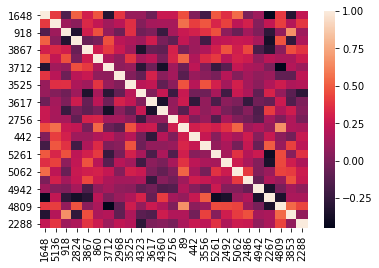

In [46]:
# user correlations
correlations = pd.DataFrame(data.transpose(), data.columns, data.index).corr()
seaborn.heatmap(correlations)

For this example, we will make predictions for user 3867.

Our 'neighborhood' for a user - users with N highest correlations

In [49]:
# selecting 6 neighbors 

neighbours_3867 = correlations[3867].sort_values(ascending=False)[1:6]

In [50]:
recommendations = data.fillna(0)

In [52]:
recommendations.loc[neighbours_3867.index]

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
2492,4.5,3.5,3.5,3.5,4.0,4.0,0.0,4.0,4.0,5.0,...,0.0,4.0,3.0,0.0,3.5,5.0,4.0,3.0,2.0,4.0
3853,0.0,0.0,3.5,0.0,0.0,5.0,5.0,4.0,4.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2486,3.5,2.0,4.5,3.5,2.5,4.5,3.0,3.5,4.5,4.5,...,0.5,0.5,0.5,3.0,2.5,3.0,2.5,3.5,3.0,1.5
3712,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,4.0,4.5,0.0,4.5,4.5,4.0
2288,0.0,3.5,3.5,0.0,3.5,3.0,0.0,5.0,5.0,3.0,...,0.5,0.0,0.0,0.0,4.0,3.5,0.0,4.0,4.0,0.0


In [55]:
# calculations for top-5 movies

(recommendations.loc[neighbours_3867.index].multiply(
    neighbours_3867, axis=0).sum(axis=0) / (recommendations.iloc[:, :] != 0).multiply(
    neighbours_3867, axis=0).sum(axis=0)).sort_values(ascending=False)[:5]

1891: Star Wars: Episode V - The Empire Strikes Back (1980)    4.760291
155: The Dark Knight (2008)                                    4.551454
122: The Lord of the Rings: The Return of the King (2003)      4.507637
77: Memento (2000)                                             4.472487
121: The Lord of the Rings: The Two Towers (2002)              4.400194
dtype: float64

#### Item-item collaborative filtering

In item-item collaborative filtering, we provide a recommendation based on other items similar to us. The benefits of it, compared to user-user collaborative filtering, is that we usually need much less similarity computations (in most cases, there are much more users in systems than items). The most common pitfall - system provides can provide very obvious recommendations.

Score provided by item-item filtering is computed using the following formula:

$$ s(i,u) = \mu_{i} + \frac{\Sigma_{j \in I_{u}}w_{ij}(r_{u,j}-\mu_{j})}{\Sigma_{j \in I_{u}}|w_{ij}|}  $$

Example of item-item recommendation:

In [56]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
ratings_raw_data = pd.read_excel('iicf.xls')
data = pd.DataFrame(ratings_raw_data.iloc[0:20, 1:21])
data.index = ratings_raw_data.iloc[0:20,0]
data_means = data.mean(axis=0)
data

,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
User,,,,,,,,,,,,,,,,,,,,
755,2.0,5.0,2.0,NaN,4.0,4.0,1.0,2.0,NaN,3.0,2.0,NaN,5.0,2.0,5.0,4.0,2.0,5.0,NaN,NaN
5277,1.0,NaN,NaN,2.0,4.0,2.0,5.0,NaN,NaN,4.0,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
1577,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
4388,2.0,3.0,NaN,NaN,NaN,1.0,NaN,3.0,4.0,NaN,NaN,4.0,NaN,3.0,5.0,NaN,5.0,1.0,1.0,2.0
1202,NaN,3.0,4.0,1.0,4.0,1.0,4.0,4.0,NaN,1.0,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
3823,3.0,4.0,4.0,4.0,NaN,NaN,2.0,1.0,4.0,4.0,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
5448,NaN,NaN,3.0,1.0,1.0,4.0,4.0,5.0,2.0,NaN,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
5347,2.0,NaN,NaN,NaN,3.0,2.0,4.0,NaN,3.0,NaN,NaN,2.0,1.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
4117,4.0,1.0,NaN,4.0,2.0,4.0,5.0,4.0,NaN,1.0,2.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0


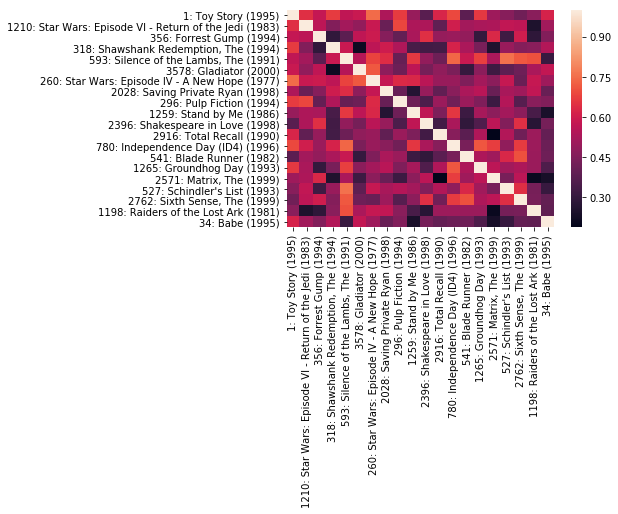

In [66]:
data.fillna(0, inplace=True)
similarities = pd.DataFrame(cosine_similarity(data.T, data.T), data.columns, data.columns)
seaborn.heatmap(similarities)

In [67]:
predictions = data.copy()
for user in data.index: #every user in index
    for movie in data.columns: #every movie for user
        mean = data_means[movie] #mean rate of this movie
        similar_movies = similarities[movie] # similar movies to this movie
        numerator = 0
        weights_sum = 0
        for sm in similar_movies.index: # for every similar movie
            weight = similar_movies[sm]
            rating = data.loc[user, sm]
            if weight > 0 and rating > 0: #which is non-negative (sim) and rated by user
                numerator += weight * (rating - mean)
                weights_sum += weight
        predictions.loc[user, movie] = mean + (numerator / weights_sum)

Finally, we filled a table with our prediction. Let's see the results for user 755:

In [69]:
predictions.loc[755].sort_values(ascending=False)

780: Independence Day (ID4) (1996)                         3.409717
1265: Groundhog Day (1993)                                 3.391725
2762: Sixth Sense, The (1999)                              3.326625
2571: Matrix, The (1999)                                   3.309275
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.292306
593: Silence of the Lambs, The (1991)                      3.272413
1259: Stand by Me (1986)                                   3.259814
541: Blade Runner (1982)                                   3.202508
1: Toy Story (1995)                                        3.192403
527: Schindler's List (1993)                               3.173982
1198: Raiders of the Lost Ark (1981)                       3.169455
3578: Gladiator (2000)                                     3.169078
2396: Shakespeare in Love (1998)                           3.154181
2916: Total Recall (1990)                                  3.146678
318: Shawshank Redemption, The (1994)           

### Matrix factorization

In matrix factorization techniques, we usually represent the rating matrix as a product of 3 other matrices.
$$R = P\Sigma Q^{T}$$

The benefits of those techniques are that they can dramatically improve system performance by reducing the necessary amount of space. Collaborative techniques can be later applied on decomposed matrices. 

This work does not cover factorization techniques in depth.

### Hybrid recommender systems

## Results

As the result of this work, the main algorithms used in modern recommendation systems were explored. I identified their benefits, fields of use, and most popular problems. The algorithms were implemented both in Python code on small datasets for purposes of demonstration of work, and in Java using LensKit toolkit.

## Conclusion

Building a good recommender system is not 